# Plotting GRN

Creating network plot for GRN. Only plotting top 20 highest connectivity nodes.

## Setup
Key packages here are igraph (Network analysis tools) and ggnetwork (A variation of ggplot2 for networks, utilising edges and nodes)

Centrality calculations are from prior analysis (02_Annotate_GRN.ipynb)

In [10]:
library(tidyverse)
library(annotables)
library(igraph)
library(ggnetwork)
library(viridis)

In [12]:
# Network import from 02_Annotate_GRN.ipynb

edges <- suppressMessages(read_tsv("MLL-AF4/AggregatedGraph_MLL-AF4_edges.tsv"))
nodes <- suppressMessages(read_tsv("MLL-AF4/AggregatedGraph_MLL-AF4_nodes.tsv"))

## Graph creation
Filter nodes by degree - we're not interested in nodes with low connectivity. Network then filtered by the new node set.

In [16]:
top.nodes <- nodes %>% 
  top_n(20, degree)

top.edges <- edges %>% 
  filter(from %in% top.nodes$name, to %in% top.nodes$name)

In [18]:
top.nodes %>% arrange(desc(degree))

name,symbol,degree,stress,MLL.AF4.logFC,MLL.AF4.FDR,RUNX1.logFC,RUNX1.FDR,UNC1999.logFC,UNC1999.FDR,EPZ.logFC,EPZ.FDR,IBET.logFC,IBET.FDR,Dropout_class
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4297,KMT2A,1403,91124,-0.1654671,4.686363e-03,0.103073152,1.156706e-01,0.08136769,2.919808e-01,-0.287071356,7.119594e-02,0.118295145,3.933402e-02,non-dropout
4150,MAZ,1349,42350,-0.1674546,3.223113e-02,-0.011773774,9.219892e-01,-0.12424227,2.397919e-01,-0.431026959,1.742319e-02,-0.859020307,3.670863e-47,non-dropout
1997,ELF1,1326,74412,-0.4425279,3.144216e-14,-0.025757327,7.564265e-01,-0.30071629,2.270934e-06,-0.149769783,3.849958e-01,-0.005619407,9.291080e-01,non-dropout
4609,MYC,1154,89851,-0.2487874,4.125718e-05,-0.101239506,4.123907e-01,-0.87270226,1.582076e-18,-0.812423133,6.623918e-08,-1.510863405,2.265482e-127,non-leukemia-specific dropout
4800,NFYA,1083,37107,0.1820208,2.632949e-03,-0.337715551,6.072405e-08,0.08661582,2.941175e-01,-0.116503259,5.242221e-01,-0.046970330,4.690043e-01,non-dropout
861,RUNX1,636,80864,-0.7195818,3.259343e-47,0.106547907,9.179538e-02,-0.06739302,3.889498e-01,-0.331148089,2.846625e-02,0.100256007,5.563491e-02,AF4 & AF9
4005,LMO2,573,68980,-0.4888023,2.545331e-14,-0.008670935,9.439425e-01,0.07290175,5.303476e-01,0.436042510,1.407353e-02,-1.668091109,6.922280e-99,non-dropout
405,ARNT,559,7646,0.2374961,4.145152e-04,0.104630578,2.771233e-01,-0.08307452,4.760320e-01,0.265295707,1.605366e-01,-0.397389235,3.360668e-06,non-leukemia-specific dropout
2969,GTF2I,472,78560,0.1475179,1.992409e-02,0.124436641,9.909592e-02,0.07132126,4.527902e-01,-0.009709318,9.673307e-01,-0.988453665,9.306492e-40,non-dropout


# Graph layout using ggnetwork

In [20]:
# Build the graph using annotates node table
graph <- graph_from_data_frame(top.edges, directed = T, vertices = top.nodes)

fortified.graph <- graph %>% 
  ggnetwork()

# Plotting nodes

GGnetwork is stochastic, but creates a stable graph once run. Nodes can then be annotated based on the various RNA-seq and centrality statistics, as annotated previously.

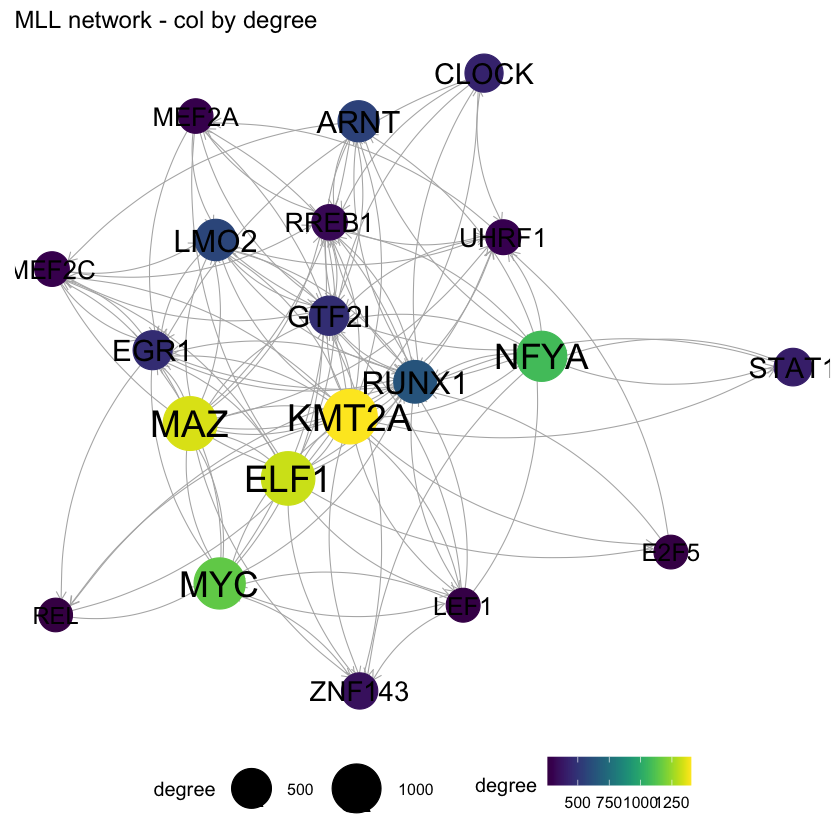

In [23]:

grn.plot <- fortified.graph %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
  geom_edges(color = "grey70", size = .3, curvature = .2, 
             arrow = arrow(length = unit(6, "pt"), type = "open")) +
  geom_nodes(aes(size = degree, col = degree)) +
  geom_nodetext(aes(label = symbol, size =  0.1 * degree)) +
  scale_size(range = c(5,15)) +
  scale_color_viridis() +
  theme_blank() +
  labs(title = "MLL network - col by degree") +
  theme(legend.position = "bottom")


grn.plot

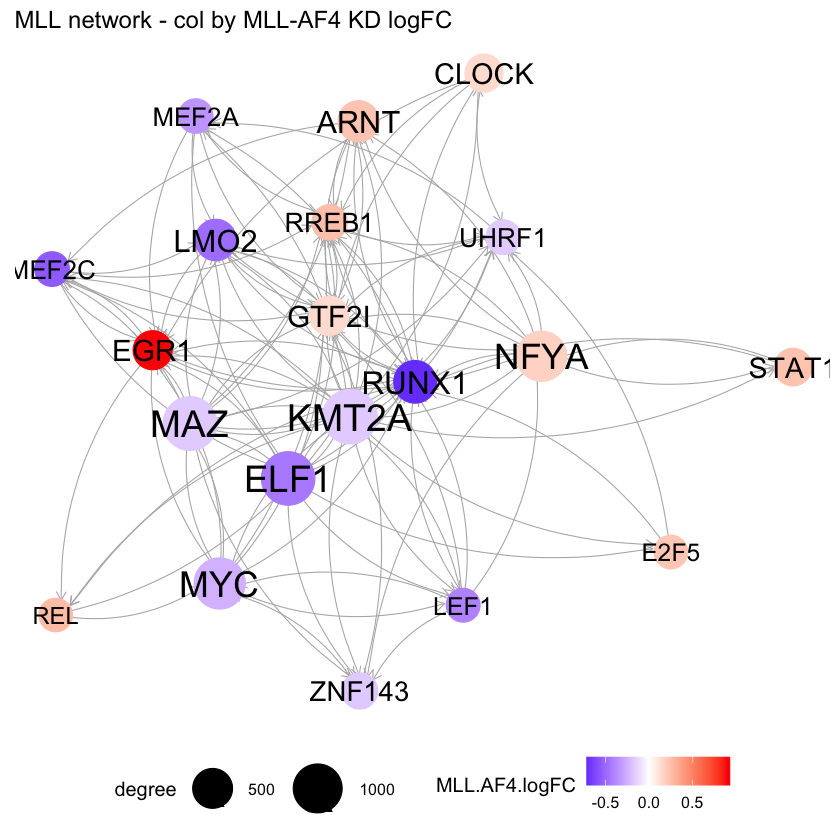

In [27]:

grn.plot <- fortified.graph %>% 
  ggplot(aes(x = x, y = y, xend = xend, yend = yend)) +
  geom_edges(color = "grey70", size = .3, curvature = .2, 
             arrow = arrow(length = unit(6, "pt"), type = "open")) +
  geom_nodes(aes(size = degree, col = MLL.AF4.logFC)) +
  geom_nodetext(aes(label = symbol, size =  0.1 * degree)) +
  scale_size(range = c(5,15)) +
  scale_color_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_blank() +
  labs(title = "MLL network - col by MLL-AF4 KD logFC") +
  theme(legend.position = "bottom")


grn.plot

In [30]:
ggsave("Network_Plots/SIMA6_top20.pdf", grn.plot, width = 7, height = 5, units = "in",
       useDingbats = F)